<a href="https://colab.research.google.com/github/danielmancovidales/Aplicaciones-en-finanzas/blob/main/seleccion_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [2]:
# Lectura de base de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/analitica3/Financiera/df_final2.csv')
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26287 entries, 0 to 26286
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   eventos                26287 non-null  int64  
 1   valor_pagado           26287 non-null  float64
 2   ciudad                 26285 non-null  float64
 3   cancer                 26287 non-null  int64  
 4   epoc                   26287 non-null  int64  
 5   diabetes               26287 non-null  int64  
 6   hipertension           26287 non-null  int64  
 7   enf_cardiovascular     26287 non-null  int64  
 8   genero                 26287 non-null  int64  
 9   edad                   26287 non-null  int64  
 10  cantidad_enfermedades  26287 non-null  int64  
 11  clasifica_diagn        26287 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 2.4 MB


<Axes: >

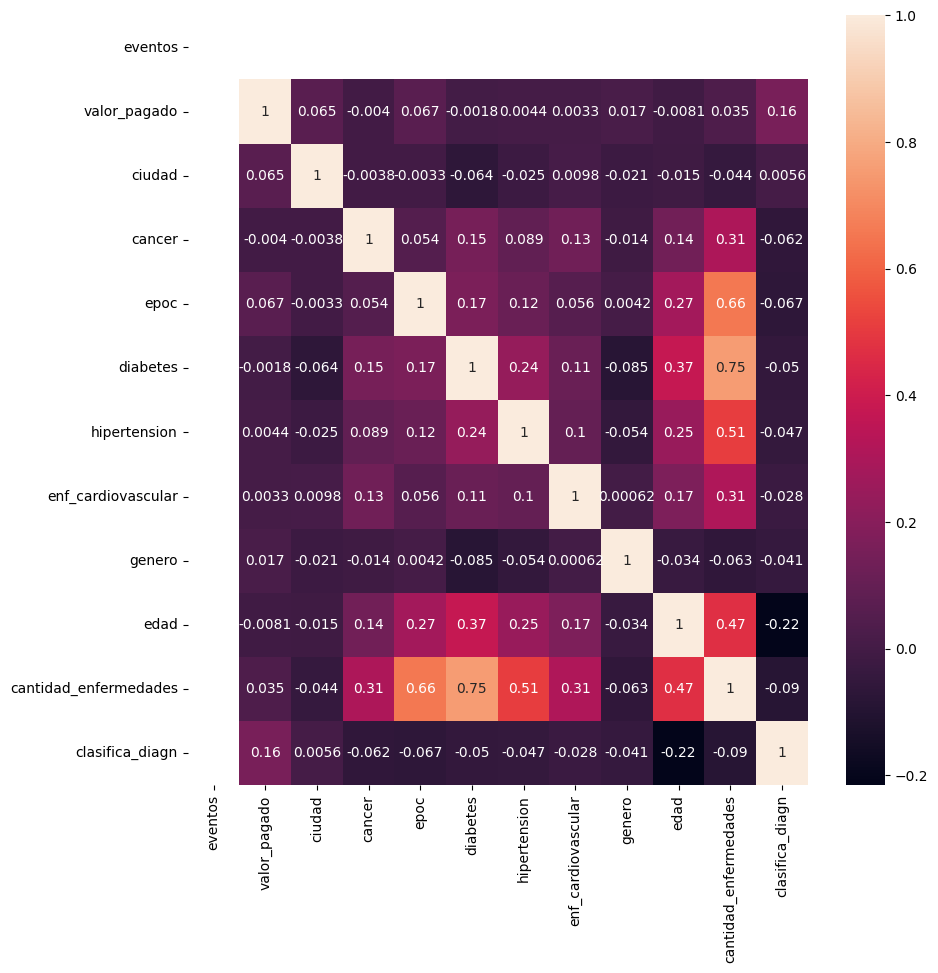

In [5]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(),annot= True)

In [6]:
#### las correlaciones mas altas

correlacion = df.corr().unstack().sort_values()
correlacion[correlacion<1].tail(15)

epoc                   edad                     0.274590
cantidad_enfermedades  cancer                   0.306266
cancer                 cantidad_enfermedades    0.306266
enf_cardiovascular     cantidad_enfermedades    0.307979
cantidad_enfermedades  enf_cardiovascular       0.307979
diabetes               edad                     0.373857
edad                   diabetes                 0.373857
cantidad_enfermedades  edad                     0.469697
edad                   cantidad_enfermedades    0.469697
cantidad_enfermedades  hipertension             0.508123
hipertension           cantidad_enfermedades    0.508123
cantidad_enfermedades  epoc                     0.655265
epoc                   cantidad_enfermedades    0.655265
diabetes               cantidad_enfermedades    0.753796
cantidad_enfermedades  diabetes                 0.753796
dtype: float64





*  Existe una correlación positiva moderada (0.33) entre la edad de una persona y la clasificación de diagnóstico de neoplasia. Esto sugiere que, en general, a medida que la edad aumenta, también puede aumentar ligeramente la probabilidad de recibir un diagnóstico de neoplasia.

*   Hay una correlación positiva moderada (0.38) entre **la edad y la presencia de diabetes**. Esto sugiere que a medida que la edad aumenta, también aumenta la probabilidad de tener diabetes.

*  Existe una correlación positiva moderada a fuerte (0.46) entre **la edad de una persona y la cantidad de enfermedades** que tiene. Esto indica que a medida que una persona envejece, es más probable que desarrolle más enfermedades.

*   Hay una correlación positiva moderada a fuerte (0.51) entre **la cantidad de enfermedades que tiene una persona y la presencia de hipertensión**. Esto sugiere que las personas con más enfermedades tienen una mayor probabilidad de tener hipertensión y viceversa.

*  Existe una correlación positiva fuerte (0.66) entre la cantidad de enfermedades que tiene una persona y la presencia de EPOC (Enfermedad Pulmonar Obstructiva Crónica). Esto indica que las personas con más enfermedades tienen una mayor probabilidad de tener EPOC

*   Hay una correlación positiva fuerte (0.76) entre **la presencia de diabetes y la cantidad total de enfermedades** que tiene una persona. Esto sugiere que las personas con diabetes tienden a tener más enfermedades en comparación con aquellas que no tienen diabetes.






In [7]:
df.isnull().sum()

eventos                  0
valor_pagado             0
ciudad                   2
cancer                   0
epoc                     0
diabetes                 0
hipertension             0
enf_cardiovascular       0
genero                   0
edad                     0
cantidad_enfermedades    0
clasifica_diagn          0
dtype: int64

In [8]:
df = df.dropna(subset=['ciudad'])

In [9]:
df.isnull().sum()

eventos                  0
valor_pagado             0
ciudad                   0
cancer                   0
epoc                     0
diabetes                 0
hipertension             0
enf_cardiovascular       0
genero                   0
edad                     0
cantidad_enfermedades    0
clasifica_diagn          0
dtype: int64

##SelectKBest

In [10]:
# Definir las características (X) y la variable objetivo (y)
y = df['valor_pagado']
X = df.drop('valor_pagado', axis=1)


# Si es un problema de clasificación
selector = SelectKBest(score_func=f_regression, k=10)  # Selecciona las 10 mejores características

# Si es un problema de regresión
# selector = SelectKBest(score_func=f_regression, k=10)

# Ajustar el selector a los datos
selector.fit(X, y)

# Obtener las columnas seleccionadas
selected_features = X.columns[selector.get_support()]

print("Características seleccionadas:", selected_features)



Características seleccionadas: Index(['ciudad', 'cancer', 'epoc', 'diabetes', 'hipertension',
       'enf_cardiovascular', 'genero', 'edad', 'cantidad_enfermedades',
       'clasifica_diagn'],
      dtype='object')


##Selector Lasso

In [11]:
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar el modelo LassoCV (cross-validated Lasso)
lasso = LassoCV(cv=5, random_state=0)  # cv=5 realiza validación cruzada de 5 pliegues
lasso.fit(X_scaled, y)

# Obtener las características seleccionadas
selected_features = X.columns[(lasso.coef_ != 0)]

print("Características seleccionadas por Lasso:", selected_features)

# Mostrar los coeficientes de las características
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(feature_importance[feature_importance['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False))

Características seleccionadas por Lasso: Index(['ciudad', 'cancer', 'epoc', 'diabetes', 'hipertension',
       'enf_cardiovascular', 'genero', 'edad', 'clasifica_diagn'],
      dtype='object')
               Feature    Coefficient
10     clasifica_diagn  407841.269622
3                 epoc  185178.257494
1               ciudad  156375.662108
7               genero   59402.998263
8                 edad   18715.435114
5         hipertension    9496.883154
2               cancer    1886.363644
6   enf_cardiovascular    1349.328952
4             diabetes   -6787.915270


Los coeficientes positivos indican una asociación positiva entre la característica y la variable de respuesta, mientras que los coeficientes negativos indican una asociación negativa.


*   Epoc (Enfermedad Pulmonar Obstructiva Crónica): Tiene el coeficiente más alto positivo, lo que significa que esta característica tiene la mayor influencia positiva en la variable de respuesta.

*   Edad: Es la segunda característica más importante, con un coeficiente positivo alto. Esto sugiere que la edad también tiene una fuerte influencia positiva en la variable de respuesta.

*   Eventos: También tiene un coeficiente positivo alto, lo que indica que esta característica tiene una influencia significativa en la variable de respuesta.

*  Género: Tiene un coeficiente positivo, lo que significa que el género también
está relacionado positivamente con la variable de respuesta, aunque en menor medida que las características anteriores.

*  Hipertensión, Ciudad de Medellín, Ciudad de Bogotá, Clasificación de diagnóstico de enfermedades endocrinas, nutricionales y metabólicas, y Cáncer: Todas estas características tienen coeficientes positivos, lo que indica que también tienen una influencia positiva en la variable de respuesta, pero menos que las características anteriores.


